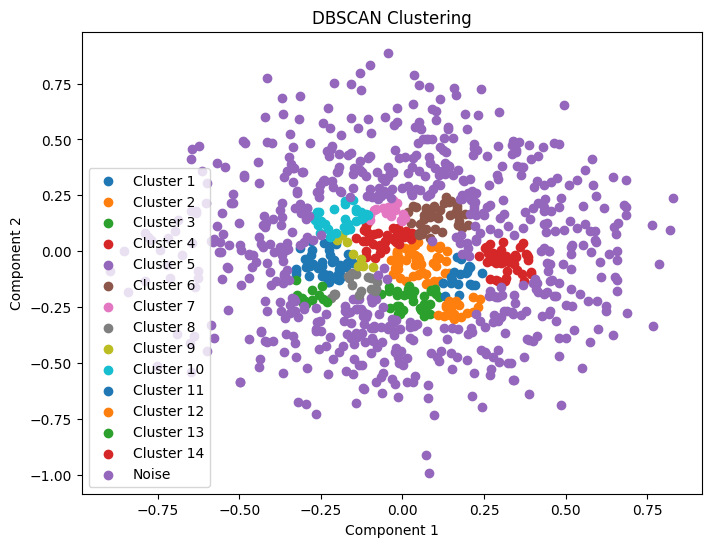

In [ ]:
# dbscan на рандомных данных +
# H.3.2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)
data = np.random.rand(1000, 10) 

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)


def region_query(data, point_idx, eps):
    return [i for i in range(len(data)) if np.linalg.norm(data[i] - data[point_idx]) <= eps]

def expand_cluster(data, labels, point_idx, neighbors, cluster_id, eps, min_pts):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if labels[neighbor_idx] == -1: 
            labels[neighbor_idx] = cluster_id
        elif labels[neighbor_idx] == 0: 
            labels[neighbor_idx] = cluster_id
            neighbor_neighbors = region_query(data, neighbor_idx, eps)
            if len(neighbor_neighbors) >= min_pts: 
                neighbors.extend(neighbor_neighbors)
        i += 1

def dbscan(data, eps, min_pts):
    labels = np.full(data.shape[0], -1) 
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != -1: 
            continue
        neighbors = region_query(data, i, eps) 
        if len(neighbors) < min_pts: 
            labels[i] = -1
        else: 
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_pts)

    return labels


eps = 0.1
min_pts = 40

labels = dbscan(data_2d, eps, min_pts)

plt.figure(figsize=(8, 6))
for cluster_id in set(labels):
    cluster_data = data_2d[labels == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}" if cluster_id != -1 else "Noise")

plt.title("DBSCAN Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()


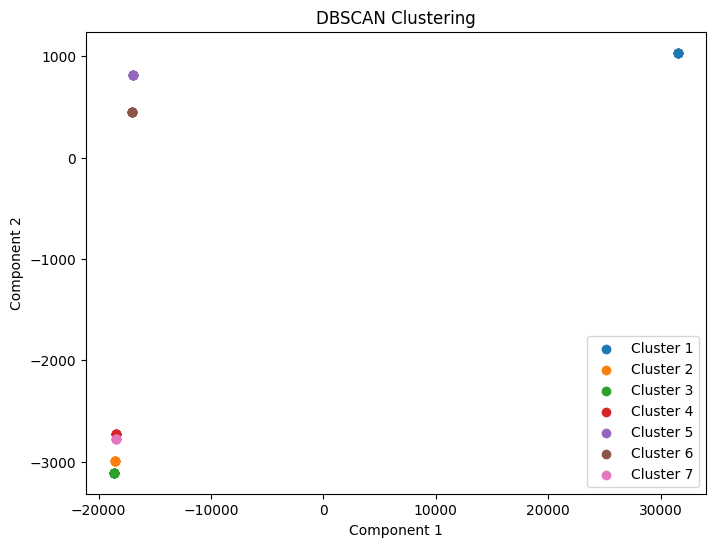

In [ ]:
# dbscan на датасете (сокращенный) + 
# H.3.2

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

def region_query(data, point_idx, eps):
    return [i for i in range(len(data)) if np.linalg.norm(data[i] - data[point_idx]) <= eps]

def expand_cluster(data, labels, point_idx, neighbors, cluster_id, eps, min_pts):
    labels[point_idx] = cluster_id
    i = 0
    while i < len(neighbors):
        neighbor_idx = neighbors[i]
        if labels[neighbor_idx] == -1: 
            labels[neighbor_idx] = cluster_id
        elif labels[neighbor_idx] == 0: 
            labels[neighbor_idx] = cluster_id
            neighbor_neighbors = region_query(data, neighbor_idx, eps)
            if len(neighbor_neighbors) >= min_pts: 
                neighbors.extend(neighbor_neighbors)
        i += 1

def dbscan(data, eps, min_pts):
    labels = np.full(data.shape[0], -1) 
    cluster_id = 0

    for i in range(len(data)):
        if labels[i] != -1: 
            continue
        neighbors = region_query(data, i, eps) 
        if len(neighbors) < min_pts: 
            labels[i] = -1
        else: 
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_pts)

    return labels

pca = PCA(n_components=2)

data_2d = pca.fit_transform(array[:10000])

eps = 2.0 
min_pts = 5 
labels = dbscan(array[:10000], eps, min_pts)

plt.figure(figsize=(8, 6))
unique_labels = set(labels)
for cluster_id in unique_labels:
    cluster_data = data_2d[labels == cluster_id]
    if cluster_id == -1:
        # plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label="Noise", color="gray")
        pass
    else:
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}")

plt.title("DBSCAN Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.show()


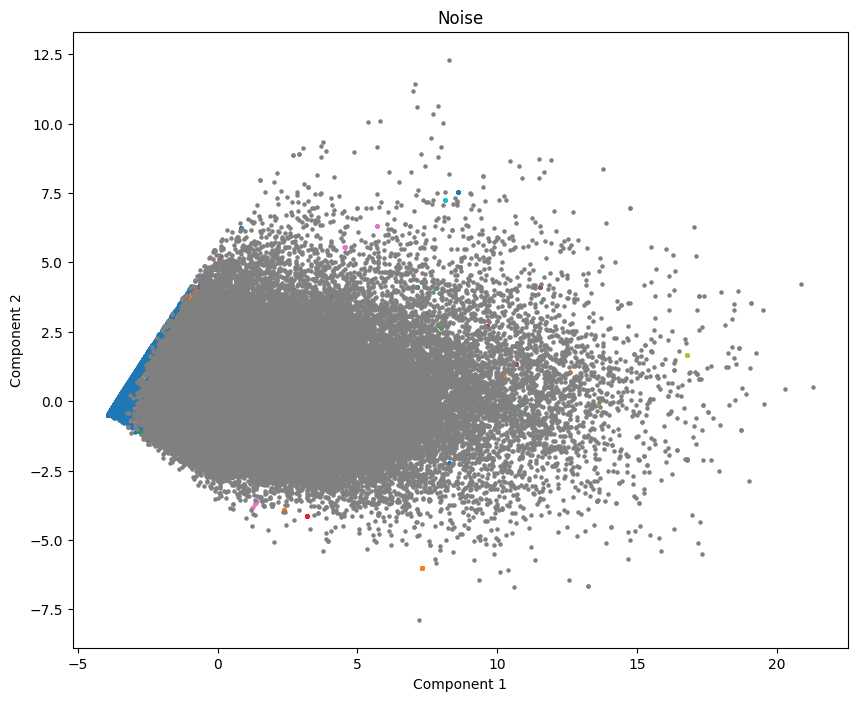

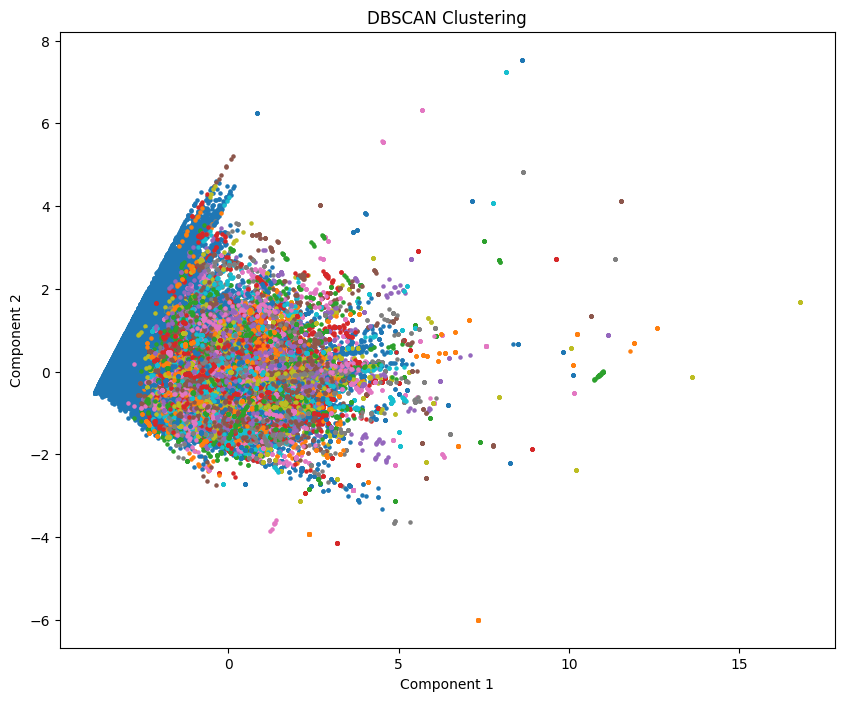

In [ ]:
# dbscan with full dataset +

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

scaler = StandardScaler()
array_scaled = scaler.fit_transform(array)

pca = PCA(n_components=2)
data_2d = pca.fit_transform(array_scaled)


eps = 0.5  
min_samples = 5  

dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)  
labels = dbscan.fit_predict(array_scaled)


plt.figure(figsize=(10, 8))
unique_labels = set(labels)
for cluster_id in unique_labels:
    cluster_data = data_2d[labels == cluster_id]
    if cluster_id == -1:
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label="Noise", color="gray", s=5)
        # pass
    else:
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}", s=5)  

plt.title("Noise")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
# plt.legend()
plt.show()

plt.figure(figsize=(10, 8))  
unique_labels = set(labels)
for cluster_id in unique_labels:
    if cluster_id != -1:  
        cluster_data = data_2d[labels == cluster_id]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_id}", s=5) 


plt.title("DBSCAN Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
# plt.legend()
plt.show()


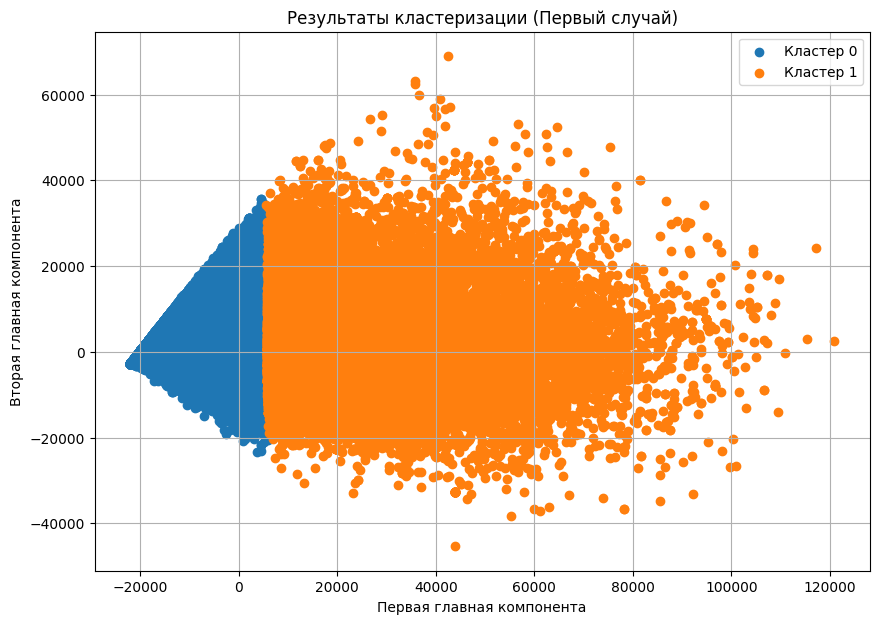

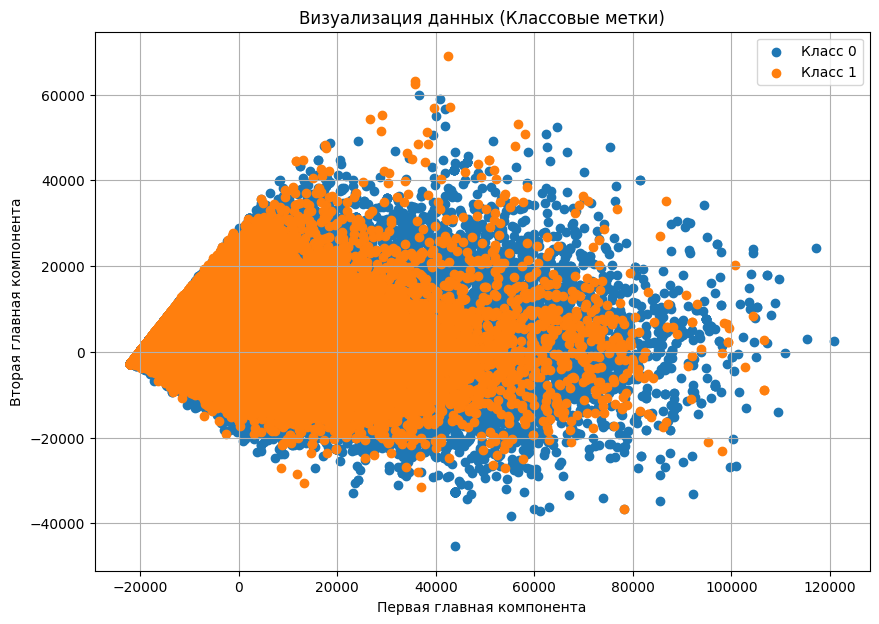

In [ ]:
# K-means k = 2 -> PCA

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

target_labels = np.array(vector_accuracy)

num_clusters = len(np.unique(target_labels)) 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(array)

cluster_labels = kmeans.labels_

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(array)

plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    cluster_points = reduced_data[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster}')
plt.title('Результаты кластеризации (Первый случай)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
for label in np.unique(target_labels):
    class_points = reduced_data[target_labels == label]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Класс {label}')
plt.title('Визуализация данных (Классовые метки)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True)
plt.show()


Оптимальное число кластеров: 2


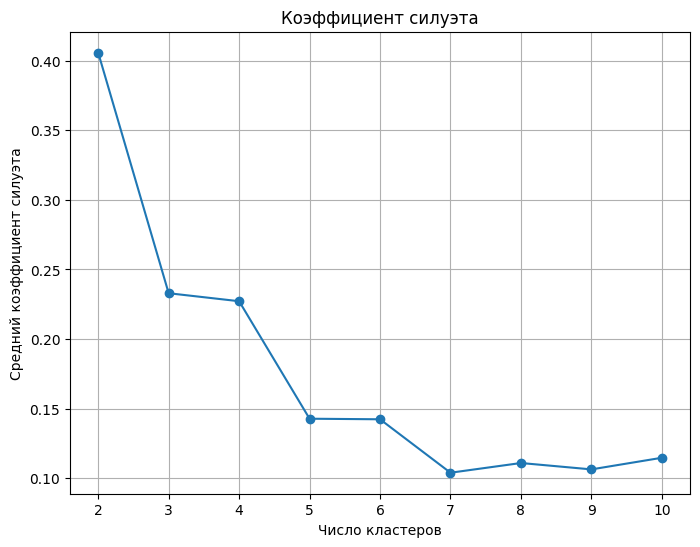

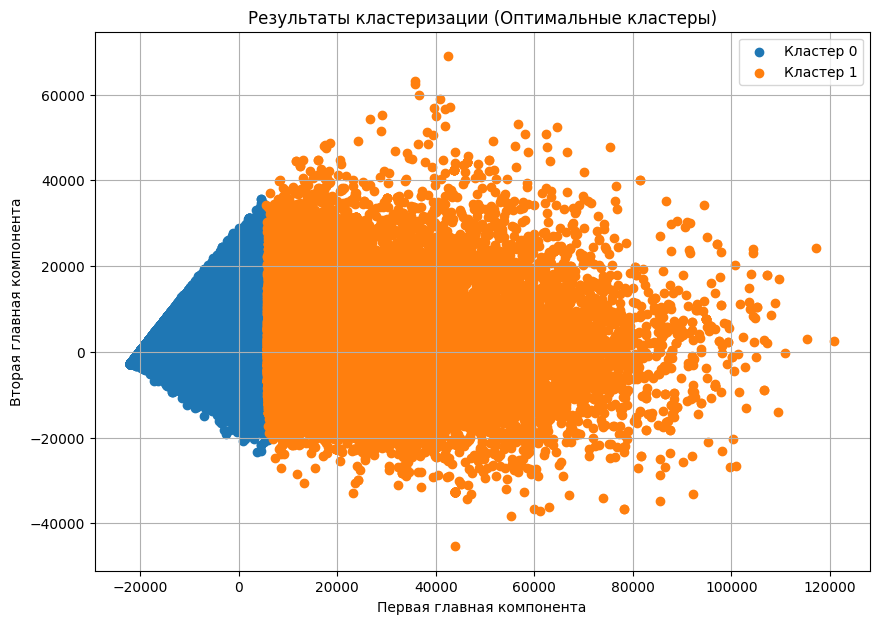

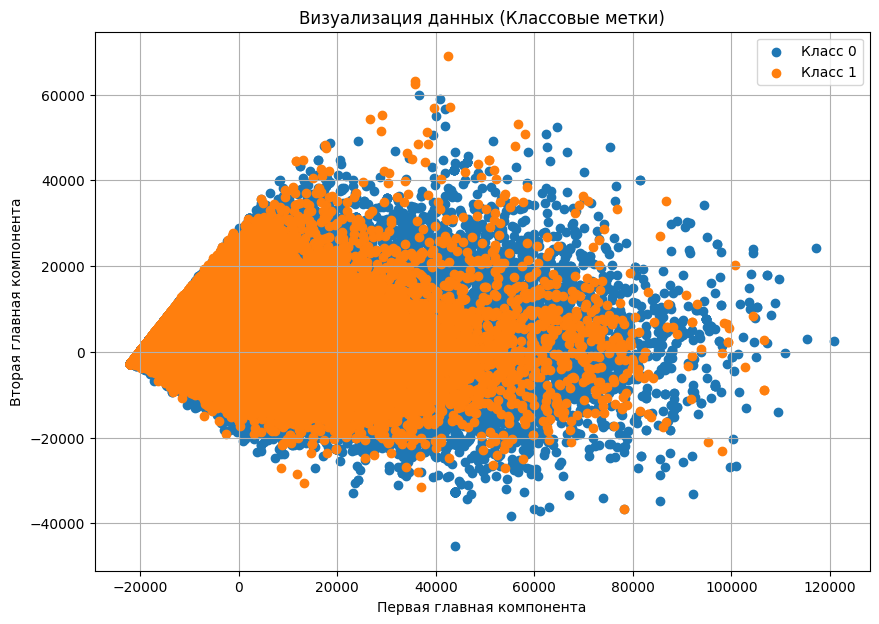

In [ ]:
# K-means k = по методу силуэта -> PCA
 
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import resample

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

sample_array = resample(array, n_samples=1000, random_state=42)

cluster_range = range(2, 11)

silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10)
    cluster_labels = kmeans.fit_predict(sample_array)
    silhouette_avg = silhouette_score(sample_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Оптимальное число кластеров: {optimal_clusters}")

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Число кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.grid(True)
plt.show()

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, max_iter=300, n_init=10)
kmeans_optimal.fit(array)
cluster_labels_optimal = kmeans_optimal.labels_

pca = PCA(n_components=2, svd_solver='randomized')
reduced_data = pca.fit_transform(array)

plt.figure(figsize=(10, 7))
for cluster in range(optimal_clusters):
    cluster_points = reduced_data[cluster_labels_optimal == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster}')
plt.title('Результаты кластеризации (Оптимальные кластеры)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
for label in np.unique(target_labels):
    class_points = reduced_data[target_labels == label]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Класс {label}')
plt.title('Визуализация данных (Классовые метки)')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True)
plt.show()


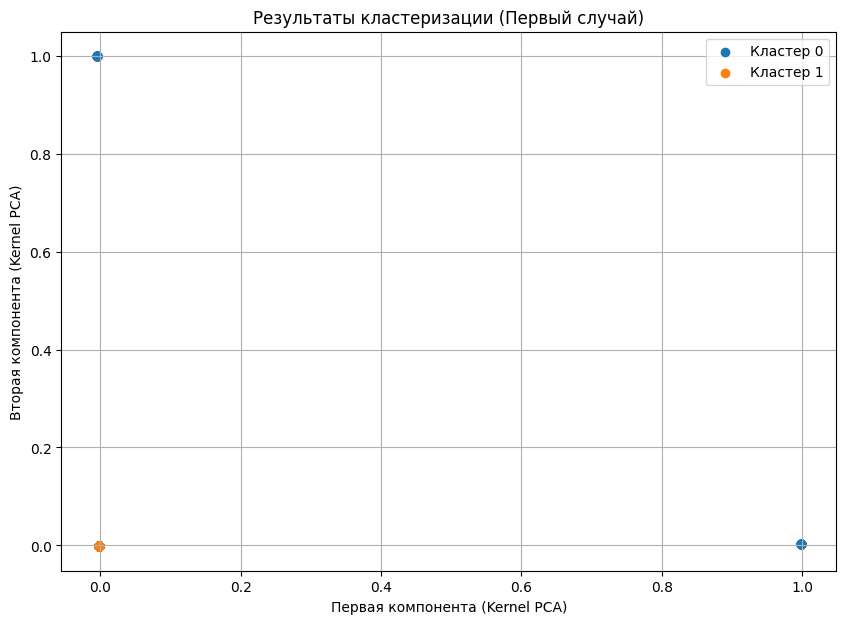

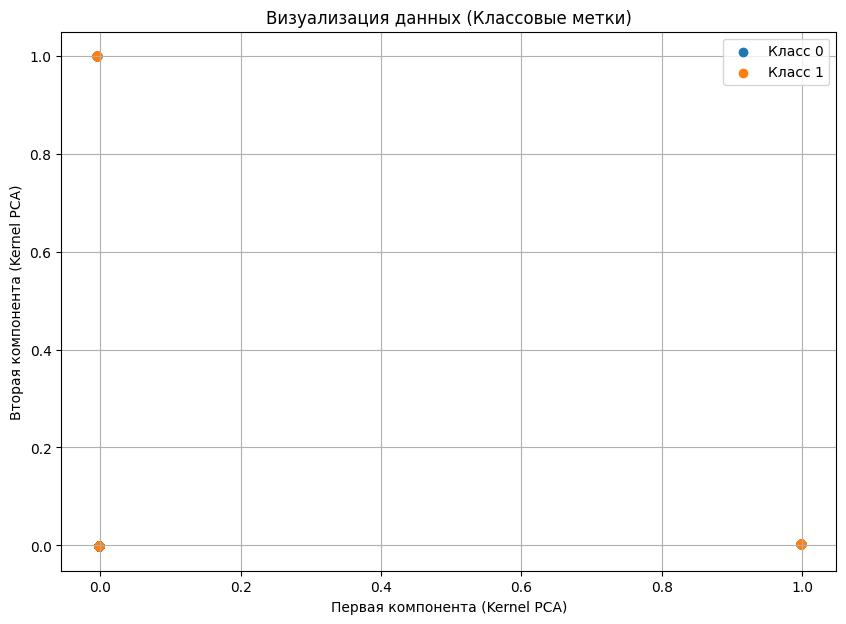

In [ ]:
# K-means k = 2 -> kernel PCA

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

df = pd.read_csv('../september/result/september.csv')
df = df.head(50000) 

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

target_labels = np.array(vector_accuracy)

num_clusters = len(np.unique(target_labels)) 
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(array)

cluster_labels = kmeans.labels_

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.1) 
reduced_data = kernel_pca.fit_transform(array)

plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    cluster_points = reduced_data[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster}')
plt.title('Результаты кластеризации (Первый случай)')
plt.xlabel('Первая компонента (Kernel PCA)')
plt.ylabel('Вторая компонента (Kernel PCA)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
for label in np.unique(target_labels):
    class_points = reduced_data[target_labels == label]
    plt.scatter(class_points[:, 0], class_points[:, 1], label=f'Класс {label}')
plt.title('Визуализация данных (Классовые метки)')
plt.xlabel('Первая компонента (Kernel PCA)')
plt.ylabel('Вторая компонента (Kernel PCA)')
plt.legend()
plt.grid(True)
plt.show()


Оптимальное число кластеров: 2


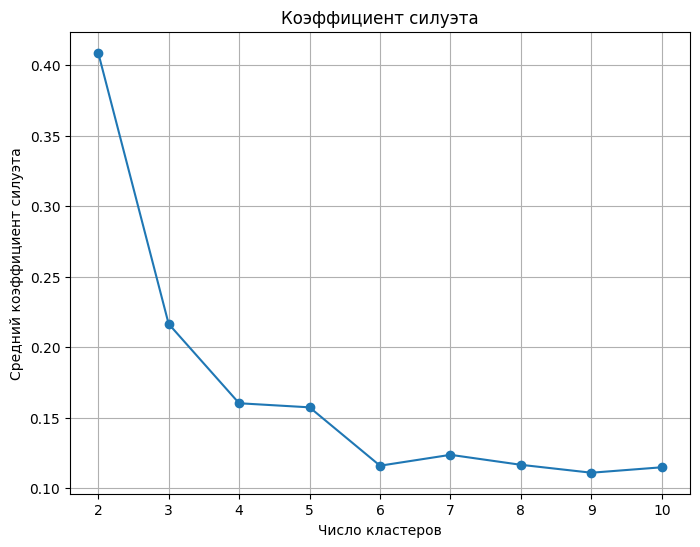

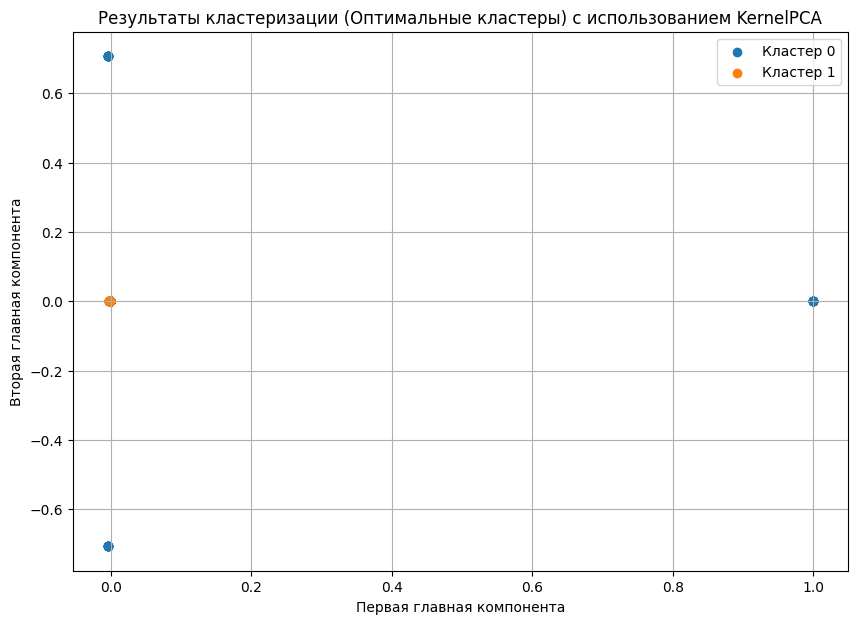

In [ ]:
# K-means k = по методу силуэта -> kernel PCA

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
from sklearn.utils import resample

df = pd.read_csv('../september/result/september.csv')
df = df.head(10000)  

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

sample_array = resample(array, n_samples=1000, random_state=42)

cluster_range = range(2, 11)

silhouette_scores = []
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=300, n_init=10)
    cluster_labels = kmeans.fit_predict(sample_array)
    silhouette_avg = silhouette_score(sample_array, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Оптимальное число кластеров: {optimal_clusters}")

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Коэффициент силуэта')
plt.xlabel('Число кластеров')
plt.ylabel('Средний коэффициент силуэта')
plt.grid(True)
plt.show()

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, max_iter=300, n_init=10)
kmeans_optimal.fit(array)
cluster_labels_optimal = kmeans_optimal.labels_

kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15) 
reduced_data = kpca.fit_transform(array)

plt.figure(figsize=(10, 7))
for cluster in range(optimal_clusters):
    cluster_points = reduced_data[cluster_labels_optimal == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Кластер {cluster}')
plt.title('Результаты кластеризации (Оптимальные кластеры) с использованием KernelPCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.legend()
plt.grid(True)
plt.show()




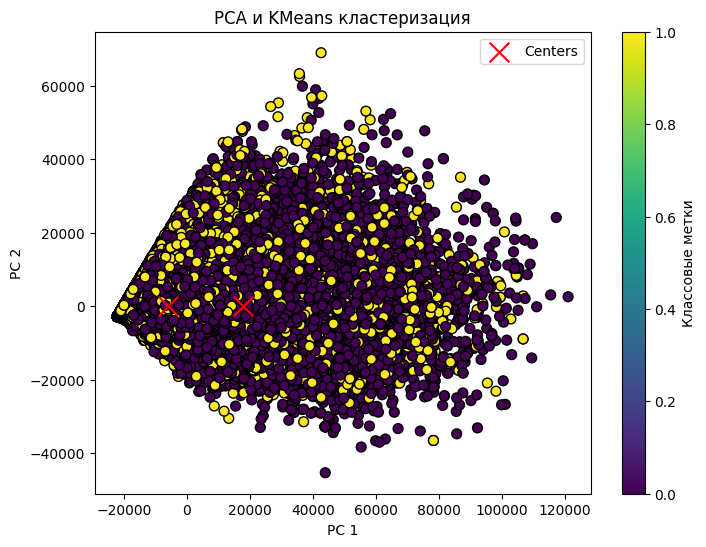

In [ ]:
# PCA -> K-means, k = 2 

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('../september/result/september.csv')

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

pca = PCA(n_components=2) 
reduced_data = pca.fit_transform(array)

kmeans = KMeans(n_clusters=2) 
kmeans_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=vector_accuracy, cmap='viridis', edgecolor='k', s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label="Centers")

plt.title('PCA и KMeans кластеризация')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.colorbar(label='Классовые метки')
plt.show()


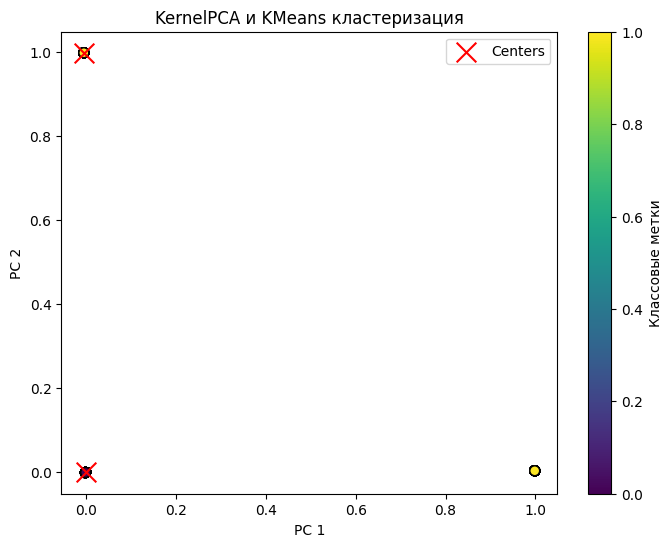

In [ ]:
# kernel PCA -> K-means, k = 2 

import numpy as np
import pandas as pd
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('../september/result/september.csv')
df = df.head(50000)

array = np.zeros((len(df), 10), dtype=int)
for i in range(len(df)):
    text_value = df.loc[i, 'text']
    if isinstance(text_value, str): 
        text_values = list(map(int, text_value.split()))  
        length = min(len(text_values), 10)  
        array[i, :length] = text_values[:length]

vector_accuracy = [0] * len(df)
for i in range(len(df)):
    text_values = df.loc[i, 'emotion_scores'].strip('[]').split()  
    if text_values:
        first_emotion_score = float(text_values[6]) 
        if first_emotion_score < 0.3:
            vector_accuracy[i] = 0
        else:
            vector_accuracy[i] = 1

kpca = KernelPCA(n_components=2, kernel='rbf') 
reduced_data = kpca.fit_transform(array)

kmeans = KMeans(n_clusters=2) 
kmeans_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=vector_accuracy, cmap='viridis', edgecolor='k', s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label="Centers")

plt.title('KernelPCA и KMeans кластеризация')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.colorbar(label='Классовые метки')
plt.show()
